In [423]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

In [424]:
#lets load the datasets
df_train = pd.read_csv('train_data_dsn.csv')
df_test = pd.read_csv('test_data_dsn.csv')

In [270]:
#checking our dataset
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [271]:
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [272]:
#checking the shape of both train and test data
df_train.shape, df_test.shape

((7160, 14), (3069, 13))

## Goal of this research is to build a predictive model to determine if a building will have an insurance claim during a certain period or not.
#### Note: 
We are going to predict the probability of having at least one claim over the insured period. The target variable is a:
<ul>
    <li>1 if the building has at least a claim over the insured period.</li>
    <li>0 if the building doesnt have a claim over the insured period.</li>
</ul>

In [273]:
#checking a general info about the training set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [274]:
#lets check that of the test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


## Step 1: Variable Identification
We saw above that some of our variables have missing values, we will deal with them later. Lets get a proper knowledge of what our variables mean before we do any form of EDA. NumberOfWindows and Geo_Code columns also look suspicious because looking at the first few vvalues, we saw that number of windows had some unfilled spaces, but its showing 7160 non null values. Also GeoCode contains numbers, but its showing data type as objects. we must first habdle these anomalies before we proceed to EDA.

### Our Variables:
<ul>
    <li>Customer_Id: This is the identification number(simply means how we identify our customers) for the policy holder</li>
    <li>YearofObervation: This is the year of observation for the insured policy. The insured policy is simply the insurance policy given to the insured by the insurer(Olusola Insurance).(my definition)</li>
    <li>Insured_Period: Duration of Insurance policy in Olusola Insurance. For example, for full year insurance policy,
    policy duration p 1; 6 months = 0.5.
    </li>
    <li>Residential: Is the building a residential building or not</li>
    <li>Building_Painted: Is the building painted or not.(N-Painted, V-Not Painted)</li>
    <li>Building_fenced: Is the building fenced or not(N-Fenced, V-Not Fenced)</li>
    <li>Garden: Does the building have garden or not(V-has Garden, O-no garden)</li>
    <li>Settlement: Area where the building is located. (R-rural area, U-urban area)</li>
    <li>Building_Dimension: Size of the insured building in $m^2$</li>
    <li>Building_Type: The type of building(Type 1,2,3,4)</li>
    <li>Date_of_Occupancy: date the building was first occupied</li>
    <li>NumberOfWindows: Number of Windows in the building</li>
    <li>Geo_Code: Geographical Code of the insured building </li>
</ul>

####  Claim: Target variable, (0: no claim, 1: at least one claim over the insured period)

## General Analysis

In [275]:
df_train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


There seems to be missing values  in the building dimension and date of occupancy columns. There  seems to be outliers in the Building dimension column. Lets try to clean our dataset before digging deeper, so we can get a clear picture..

In [276]:
df_train['NumberOfWindows'].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [54]:
df_test['NumberOfWindows'].value_counts()

   .    2240
3        227
4        194
5        151
2         70
6         70
7         54
8         26
1         16
>=10      11
9         10
Name: NumberOfWindows, dtype: int64

In [277]:
def missing_values(dataframe):
    """
    This function takes a dataframe as input and returns two columns... total missing values and their percentage
    """
    total = dataframe.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(dataframe)*100, 2)
    return pd.concat([total, percent], axis = 1, keys = ['Total Missing', '%Percentage'])

In [300]:
missing_values(df_train)

,Total Missing,%Percentage
Geo_Code,102,1.42
Garden,7,0.10
Claim,0,0.00
NumberOfWindows,0,0.00
Date_of_Occupancy,0,0.00
Building_Type,0,0.00
Building Dimension,0,0.00
Settlement,0,0.00
Building_Fenced,0,0.00
Building_Painted,0,0.00


In [302]:
missing_values(df_test)

,Total Missing,%Percentage
Geo_Code,13,0.42
Garden,4,0.13
NumberOfWindows,0,0.00
Date_of_Occupancy,0,0.00
Building_Type,0,0.00
Building Dimension,0,0.00
Settlement,0,0.00
Building_Fenced,0,0.00
Building_Painted,0,0.00
Residential,0,0.00


## Observation:
There are three columns with missing values we will fill Building dimension and Dateof occupancy with Building type then we will fill Geo code with the mode. Filling with Building type seems logical because most building types tend to have the same building dimension. You will also notice that the Number of windows column is indicating that there are no missing values, while this is true, we can see that some values contain very unsual values... after much research and trials, i found that this unusual value is three spaces annd a dot.

## How to Proceed?
We will start by replacing those unsual values in the NumberOfWindows column with non, THEN, we will fill those non values using the groupby function(We will be comparing with the building type column ). We will convert the enteries in the Geo_Code columns to floats the fill the missing values with the mode. Date of occupancy will be filled using the mode.The Garden will also be filled with the mode.

In [425]:
df_train["Building Dimension"].fillna(df_train["Building Dimension"].mean(), inplace = True)

In [426]:
df_test["Building Dimension"].fillna(df_train["Building Dimension"].mean(), inplace = True)#we are using the mean of the train set

In [427]:
#replacing the . values with N in both train and test data
df_train['NumberOfWindows'] = df_train.loc[:,'NumberOfWindows'].replace({'   .':'non'})

In [428]:
df_test['NumberOfWindows'] = df_test.loc[:,'NumberOfWindows'].replace({'   .':'non'})

In [326]:
aggregations = ({'Building Dimension': 'mean'})#mum of fuel_qty_burned in each group
df = df_train.groupby('NumberOfWindows').agg(aggregations)
df

,Building Dimension
NumberOfWindows,
1,1257.628571
2,653.936851
3,1336.542689
4,1788.634125
5,2449.731760
6,3127.320961
7,3454.561983
8,4154.789883
9,4640.851852


In [429]:
#lets call a function to help us fill N using the above information
def my_estimator(i):
    a = 0
    if i < 1200:
        a = '2'
    elif i >=1200 and i<1300:
        a ='1'
    elif i >=1300 and i<1500:
        a ='3'
    elif i >=1500 and i<1900:
        a ='4'
    elif i >=1900 and i<2600:
        a ='5'
    elif i >=2600 and i<3300:
        a ='6'
    elif i >=3300 and i<3500:
        a ='7'
    elif i >=3500 and i<4500:
        a ='8'
    elif i >=4500 and i<4800:
        a ='9'
    else:
        a = '>=10'
    return a
        

In [430]:
#saving those instances with N as their values in the column_with_null_values in a variable
df_with_N = df_train[df_train['NumberOfWindows'] == 'non']
df_without_N = df_train[df_train['NumberOfWindows'] != 'non']
#we want to apply a function to those values that we filled with N in the column_with_null_values
df_with_N.loc[:, 'NumberOfWindows'] = df_with_N['Building Dimension'].apply(lambda x: my_estimator(x))

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [431]:
df_train = pd.concat([df_with_N, df_without_N], axis = 0)

In [432]:
df_with_N_test = df_test[df_test['NumberOfWindows'] == 'non']
df_without_N_test = df_test[df_test['NumberOfWindows'] != 'non']
df_with_N_test.loc[:, 'NumberOfWindows'] = df_with_N_test['Building Dimension'].apply(lambda x: my_estimator(x))

In [433]:
df_test = pd.concat([df_with_N_test, df_without_N_test], axis = 0)

In [434]:
#filling Date_of_Occupancy with the most common
df_train["Date_of_Occupancy"].fillna(df_train['Date_of_Occupancy'].mode()[0], inplace = True)

In [435]:
df_test["Date_of_Occupancy"].fillna(df_train['Date_of_Occupancy'].mode()[0], inplace = True)

In [436]:
df_train["Geo_Code_num"] = df_train["Geo_Code"].str.replace('([A-Za-z]+)','')
df_train["Geo_Code_text"] = df_train['Geo_Code'].str.extract('([A-Za-z]+)')

In [437]:
df_test["Geo_Code_num"] = df_test["Geo_Code"].str.replace('([A-Za-z]+)','')
df_test["Geo_Code_text"] = df_test['Geo_Code'].str.extract('([A-Za-z]+)')

In [457]:
df_train['Geo_Code_num'] = df_train['Geo_Code_num'].astype(float)
df_test['Geo_Code_num'] = df_test['Geo_Code_num'].astype(float)

In [439]:
df_test.drop(['Geo_Code', 'Geo_Code_text'], axis = 1, inplace = True)

In [440]:
df_train = df_train.drop(['Geo_Code', 'Geo_Code_text'], axis = 1)

In [441]:
df_train["Geo_Code_num"].fillna(df_train['Geo_Code_num'].mode()[0], inplace = True)
df_test["Geo_Code_num"].fillna(df_train['Geo_Code_num'].mode()[0], inplace = True)

In [442]:
df_train["Garden"].fillna(df_train['Garden'].mode()[0], inplace = True)
df_test["Garden"].fillna(df_train['Garden'].mode()[0], inplace = True)

## Continuation Of Analysis:

In [24]:
df_train['Building Dimension'].skew()

3.122788945111711

In [25]:
df_train['Building Dimension'].kurt()

13.462375245577228

##  Analysis on the Building dimension column:
<ol>
    <li>Recall that standard deviation refers to how data is spread out from the mean. when the standard deviation is low, then  the values(data points) tend to be close to the mean. Looking at this column in particular, we can say that the data points arent close to the mean. So there is a very high chance that we will be dealing with outliers.</li>
    <li>Skewness telss us whether our data points are skewd or symmetric... in this case, we are dealing with a positive skew. Which mostly implies that the mean is greater than the mode.</li>
    <li>Kurtosis helps us in identifying outliers. If our kurtosis value is greater than 3, we are most likely going to have outliers... we can see that we have a kurtosis of 13.46.</li>
</ol>

We used the table to do a quick run down of what was going on with the Building dimension column, because it semes illogocal to build a house on  one meter square. There was really nothing to be concerned about. But we may have to replace the ones in this column. The building with the very high building dimension most probably belongs to a very wealthy person(they are not outliers), and those with very low Building dimension most likely belongs to the poor. Also most people with very high dimension of building seems to file at least one claim over the insured period.

In [22]:
df_train[(df_train['Building Dimension'] >=15000) | (df_train['Building Dimension']==1)]

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
180,H5724,2015,0.580822,1,V,V,V,U,18000.0,4,1980.0,.,6029,1
395,H17781,2013,1.000000,1,V,N,O,R,15000.0,4,1965.0,7,6088,1
396,H17782,2015,0.915068,1,V,N,O,R,15000.0,4,1965.0,7,6088,1
481,H6756,2012,0.000000,1,N,V,V,U,1.0,4,1988.0,.,6088,0
491,H14143,2012,0.248634,1,N,V,V,U,1.0,4,1988.0,.,6089,0
883,H14723,2013,0.665753,0,N,V,V,U,17860.0,1,1960.0,.,13077,1
1492,H6938,2013,1.000000,1,V,V,V,U,16859.0,2,1980.0,.,13213,0
1816,H14016,2012,1.000000,0,N,V,V,U,1.0,1,1988.0,.,21278,0
1871,H14255,2013,1.000000,0,N,V,V,U,17800.0,2,1980.0,.,25580,0
2045,H14282,2015,1.000000,0,V,N,O,R,20940.0,2,1969.0,4,30133,1


# Step 3: EDA(univariate cases)
Lets explore some of our variables to get better understanding of our data

In [29]:
#lets get the list of numerical and categorical column
def get_list_of_datatype(df):
    cat_features = df.select_dtypes(include = ['object'])
    #to store the columns in a list
    cat_list = cat_features.columns.tolist()
    #for numerical features
    num_features = df.select_dtypes(include = [np.number])
    #to store the columns in a list
    num_list =  num_features.columns.tolist()
    print(f"The number of numerical columns is: {len(num_list)} and they are\n\n{num_list}")
    print('**'*60)
    print(f"The number of categorical columns is: {len(cat_list)}  and they are\n\n{cat_list}")
get_list_of_datatype(df_train)

The number of numerical columns is: 7 and they are

['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim']
************************************************************************************************************************
The number of categorical columns is: 7  and they are

['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']


In [10]:
get_list_of_datatype(df_test)

The number of numerical columns is: 6 and they are

['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy']
************************************************************************************************************************
The number of categorical columns is: 7  and they are

['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']


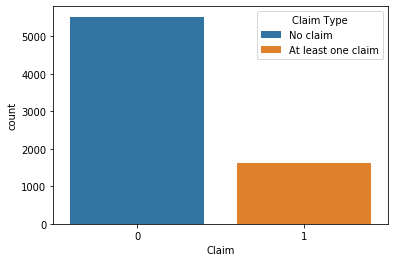

In [12]:
#now that we have our variables all listed out, we begin some analysis
#distribution of the claim, to check for imbalances
ax = sns.countplot(data = df_train, x = 'Claim', hue = 'Claim', dodge = False)
h, l = ax.get_legend_handles_labels()
labels = ['No claim', 'At least one claim']
ax.legend(h, labels, title = 'Claim Type', loc = 'upper right')
plt.show()

## Imbalanced data:
An imbalance occurs when one or more classes have very low proportions in the training data as compared to other classes.
We are going to use a function to check if our dataset is imbalanced. $\textbf{Shannon entropy}$ measure of $\textbf{balance}$. This principle states that on a dataset of $n$ instances, if you have $k$ classes of size $c_i$, we can compute entropy as follows:
$$ H = -\sum_{i=1}^{k}\frac{c_i}{n}\log\frac{c_i}{n} $$
This is equal to:
<ul>
    <li>0 when there is one single class. In other words, it tends to 0 when your data set is very unbalanced</li>
    <li>$\log k $ when all your classes are balanced of the same size $\frac{n}{k}$</li>    
</ul>
    
Therefore, we could use the following measure of $\textbf{Balanced}$ for a data set.
$$ \text{Balanced} = \frac{H}{\log k}\\
= \frac{-\sum_{i=1}^{k}\frac{c_i}{n}\log\frac{c_i}{n}}{\log k}
$$

In our data set, $n = 7160$, $k = 2$, $\text{we have}$  $c_1 = 5526$  $\text{and}$  $c_2 = 1634$.
After calculating, we obtained $0.232$... This shows that the data set is tending towards an imbalance. I love to set $0.1$ as the benchmark for an imbalanced set. With this, we can take the risk by moving on, if we find that our model is not performing well, then we will try to balance the set.

    

In [14]:
#lets get the amount of each class that we have
df_train['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

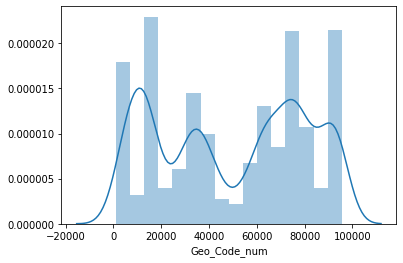

In [313]:
#distribuution for all the Geo Code columns
sns.distplot(df_train['Geo_Code_num'])

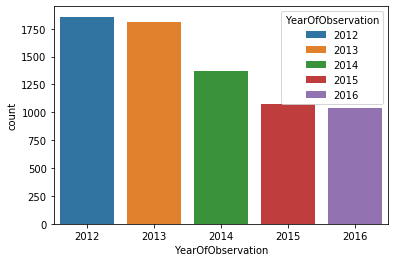

In [17]:
sns.countplot(data = df_train, x = 'YearOfObservation', hue = 'YearOfObservation', dodge = False)
#we see a decrease in the Year of observation since 2012, especially from 2013 to 2014

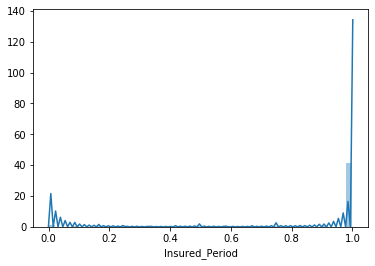

In [58]:
#lets see how the insured period was distributed
sns.distplot(df_train['Insured_Period'])

## Analysis:
Quite a messy distribution, but its expected, since we are dealing with a continuous column

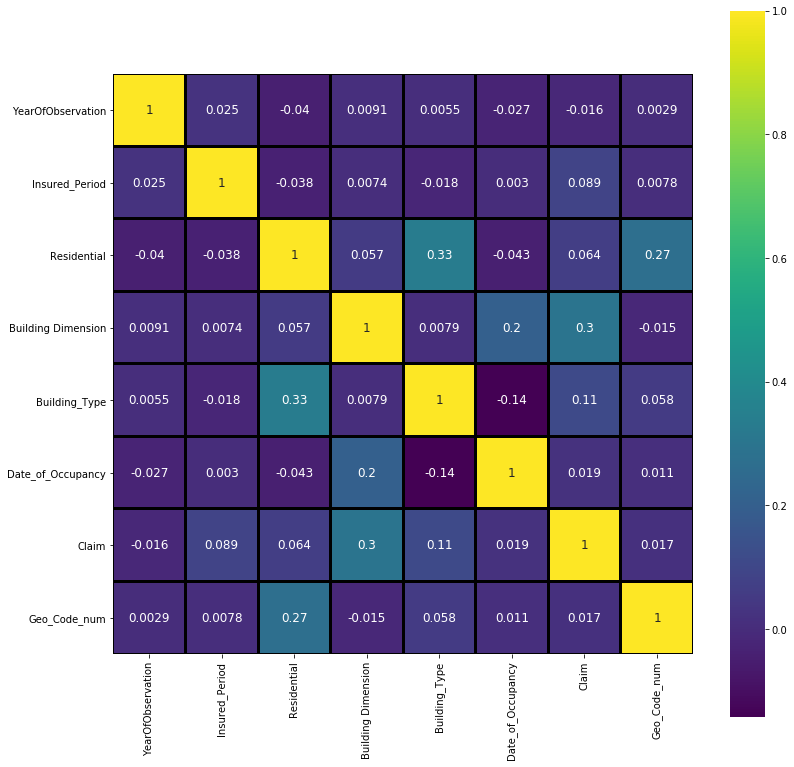

In [314]:
# lets see a correlation plot for the continuous variables
fig, axs = plt.subplots(nrows = 1, figsize=(13,13))
sns.heatmap(df_train.corr(),annot=True, square = True, cmap = 'viridis', linewidths = 2, linecolor = 'black', 
           annot_kws = {'size':12})

## Assumptions and Inference:

<ol>
    <li>We can see that Building dimension and building type seems to be the two most correlated to the Claim. This makes sense because we can assume that most of the building types that most likely belong to the rich will likely not come for an insurance claim. Most likely because their houses are usually well built and protected(Just my assumption).</li>
    <li>Also, residential and building type should be correlated, you cant imagine people living in a building with office structure. We can also see that building type and date of occupancy seems to be slightly correlated inversely.</li>
    <li>Lastly, building dimension and date of occupancy should be correlated, this is because the dimension of buildings tend to change probably to fit modern design.</li>
    <li>We can also see another reason why data cleaning shoould come before analysis, the geo_code was not numerical initially, but after some transformation, we can now see some correlation with residential, which makes sense.</li>
</ol>

#### There is no urgent reason to do any form of feauture extraction on thsese continuous variables... lest see how numericals fare with the Claim column.

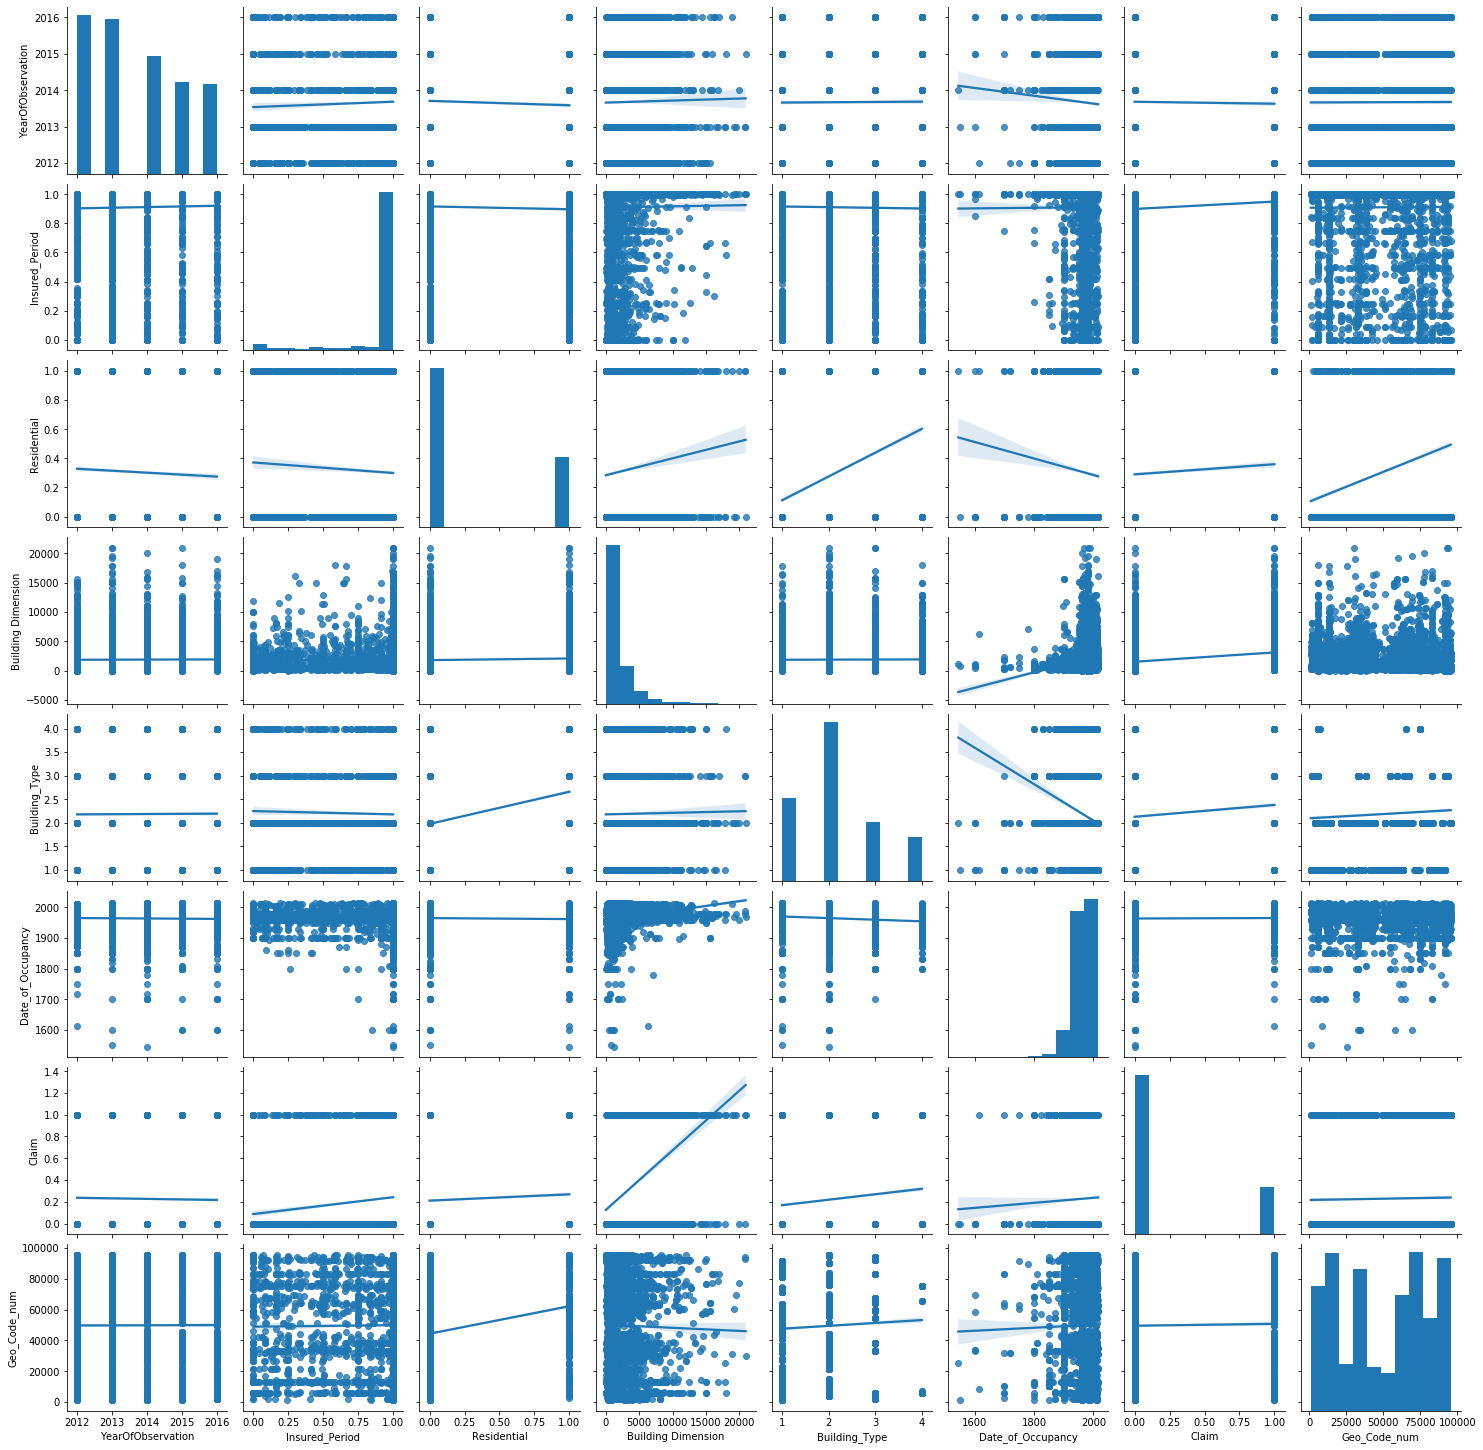

In [315]:
g = sns.pairplot(df_train, kind = 'reg')

## Analysis:

We can see how numerical columns in our dataset are related and distributed. At the end of the plot, we see how the columns are related to the Claim. As we can see again, Building dimension is showing a strong correlation to the claim. Also, there is also an inverse correlation between date of occupancy and building type. Building dimension and residential also seems to be fairly correlated. Residential and building type also seemms to be correlated. We cant clearly see outliers here, but lets use box plots to understand our categorical columns.

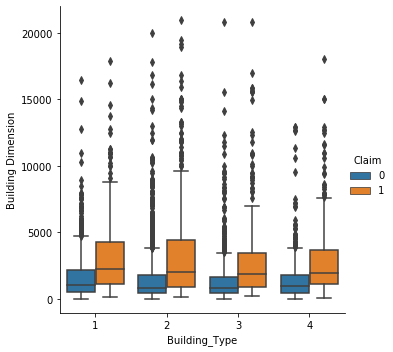

In [41]:
#lets start with building dimension and building type
sns.catplot(x = 'Building_Type', y = 'Building Dimension', hue = 'Claim', kind = 'box', data = df_train)

## Analysis:
Recall that boxplots are graphical display of the five number summary, i.e the minimum, Q1(25th percentile), the median, Q2(50th percentile), Q3(75th percentile), maximum and outliers. In the plot above, we can see that Claim(1) seem to contain very high values for Building dimension compared to Claim(0). Although, both cases seem to contain points acting like outliers. Building type(2), Claim(1) has the maximum observed point not acting like an outlier. We may need to scale(feature scaling) this column(Building dimension) later on during featurre engineering.Type(3) and Type(4) buildings see to have low building dimensions compared to type(1&2). Also, Claim(0) seem to contain data points with low building dimension. Recall that every feature is represented by $\textbf{Magnitude} $ and $\textbf{Unit}$ But If we wont be needing algorithms such as KNN, Linear Regression and so on, we may not need to sscale our column.

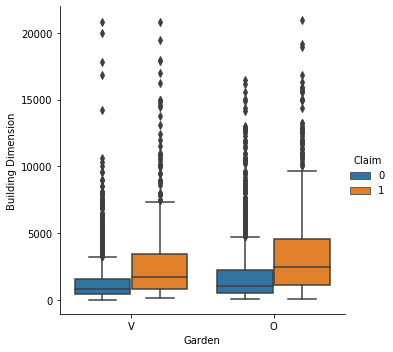

In [45]:
sns.catplot(x = 'Garden', y = 'Building Dimension', hue = 'Claim', kind = 'box', data = df_train)

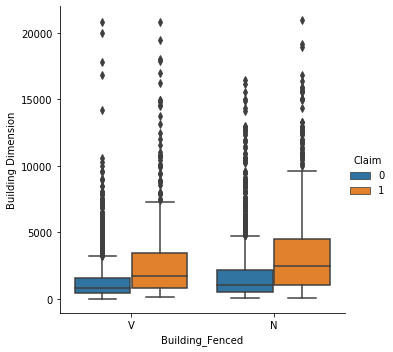

In [43]:
sns.catplot(x = 'Building_Fenced', y = 'Building Dimension', hue = 'Claim', kind = 'box', data = df_train)

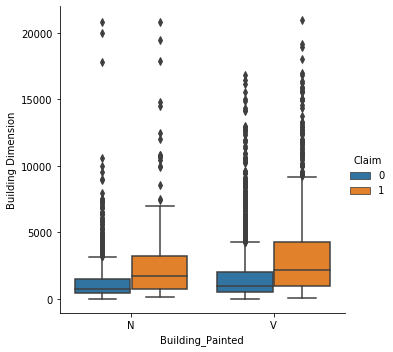

In [46]:
sns.catplot(x = 'Building_Painted', y = 'Building Dimension', hue = 'Claim', kind = 'box', data = df_train)

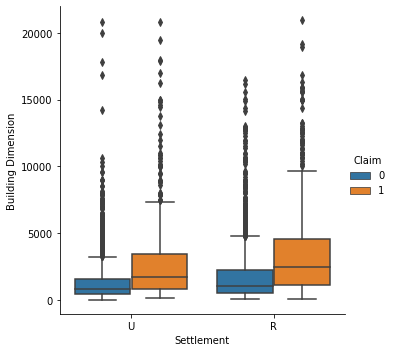

In [47]:
sns.catplot(x = 'Settlement', y = 'Building Dimension', hue = 'Claim', kind = 'box', data = df_train)

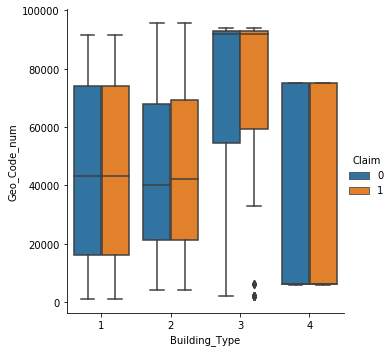

In [316]:
sns.catplot(x = 'Building_Type', y = 'Geo_Code_num', hue = 'Claim', kind = 'box', data = df_train)

## Multivariate analysis:

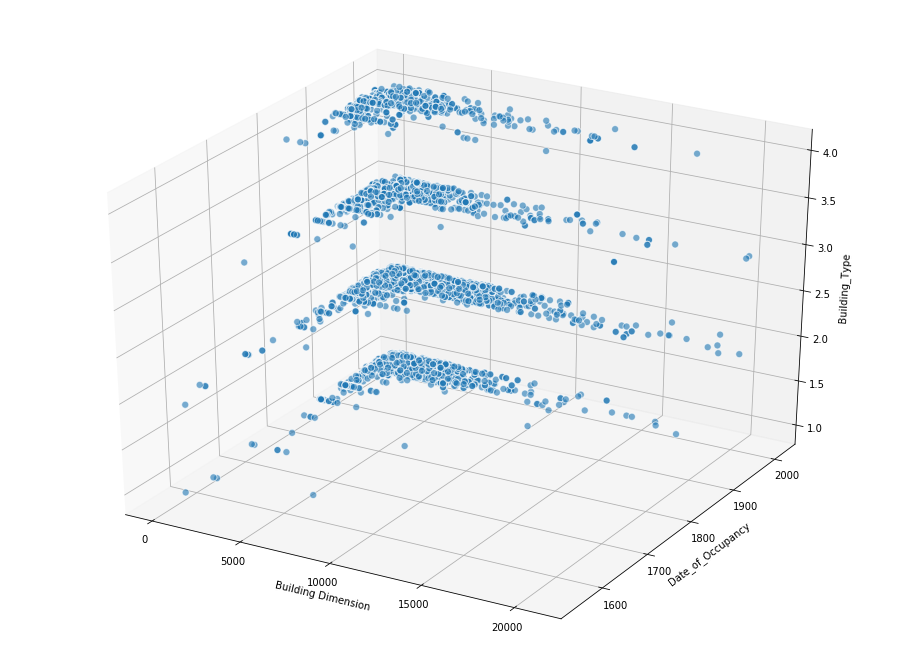

In [336]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
xscale = df_train['Building Dimension']
yscale = df_train['Date_of_Occupancy']
zscale = df_train['Building_Type']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('Building Dimension')
ax.set_ylabel('Date_of_Occupancy')
ax.set_zlabel('Building_Type')
plt.show()

## Analysis:
The above plots have shown us some relationship between the Claim, Building Dimension and some categorical variable... We chose the Building dimension because it is the most corelated to The claim. The plots are self explained... For instance, we can see that Rural Settlements seem to contain many buildings with high dimension.
Lets see some CATEGORICAL VS CATEGORICAL ANALYSIS using pivot table and crosstab.

In [48]:
pd.crosstab(df_train['Building_Type'], df_train['Settlement'],margins = True, margins_name = 'Total sum')

Settlement,R,U,Total sum
Building_Type,,,
1,853,863,1716
2,1638,1667,3305
3,645,585,1230
4,474,435,909
Total sum,3610,3550,7160


## Analysis:
The analysis of the above table is pretty straightforward. Building Type(2) seem to contain the largest amount of buildings in both Rural and Urban areas We also see that Building Type(4) is not a very common type of building in those Settlements.  

In [49]:
pd.crosstab(df_train['Building_Fenced'], df_train['Building_Painted'],margins = True, margins_name = 'Total sum')

Building_Painted,N,V,Total sum
Building_Fenced,,,
N,7,3601,3608
V,1771,1781,3552
Total sum,1778,5382,7160


## Analysis:
A quite fascinating observation here, just 7 of the buildings that are painted are actually fenced, but buildings not painted and not fenced are almost evenly distributed.

In [317]:
#lets get the list of our columns again
get_list_of_datatype(df_test)

The number of numerical columns is: 6 and they are

['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy']
************************************************************************************************************************
The number of categorical columns is: 7  and they are

['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code_num']


## Feature Engineering:
We would be encoding all the categorical column with the label encoding

In [327]:
#lets check if the train and test data have unique categories
cat_cols_spec = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows']
for col in cat_cols_spec:
    df_train_col = df_train[col].unique() #get the unique categories in that particular column
    df_test_col = df_test[col].unique()
    print('Categories Not in Test' + col + ' ', [i for i in df_train_col if i not in df_test_col])
    print('Categories Not in Train' + col + ' ',  [i for i in df_test_col if i not in df_train_col])
    print('**'* 35)

Categories Not in TestBuilding_Painted  []
Categories Not in TrainBuilding_Painted  []
**********************************************************************
Categories Not in TestBuilding_Fenced  []
Categories Not in TrainBuilding_Fenced  []
**********************************************************************
Categories Not in TestGarden  []
Categories Not in TrainGarden  []
**********************************************************************
Categories Not in TestSettlement  []
Categories Not in TrainSettlement  []
**********************************************************************
Categories Not in TestNumberOfWindows  []
Categories Not in TrainNumberOfWindows  []
**********************************************************************


In [443]:
#label encoding the Building_Painted
from sklearn import preprocessing
cat_list = cat_cols_spec
labelEncoder = preprocessing.LabelEncoder()
mapping_dict = {}#the labes will be stores here
for col in cat_list:
    df_train[col] = labelEncoder.fit_transform(df_train[col])
    df_test[col] = labelEncoder.fit_transform(df_test[col])
    my_map = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    #zip will merge the categories to their respectives in a turple
    mapping_dict[col] = my_map
    

In [333]:
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,Geo_Code_num
0,H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,1,0,1053.0
2,H3802,2014,1.0,0,0,1,1,1,595.0,1,1960.0,1,0,1053.0
3,H3834,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,5,0,1053.0
6,H7390,2012,1.0,0,0,1,1,1,2830.0,1,1988.0,5,0,1143.0
7,H14488,2015,1.0,0,0,1,1,1,4952.0,1,1988.0,9,0,1160.0


In [445]:
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code_num
2,H9805,2013,0.369863,0,1,1,1,1,790.0,1,1960.0,1,3310
5,H10545,2012,1.000000,0,1,1,1,1,3225.0,2,1988.0,5,4070
6,H8962,2015,0.986301,0,0,1,1,1,31.0,2,1960.0,1,4070
7,H1015,2013,1.000000,0,1,1,1,1,1400.0,2,1980.0,2,4088
8,H9710,2012,1.000000,0,1,1,1,1,1300.0,2,1960.0,2,4094


In [449]:
#we can drop the id column, it is not really helpful and put our labels into another variable
#label = df_train['Claim']
#df_train.drop(['Customer Id', 'Claim'], axis = 1, inplace = True)

In [450]:
test_id = df_test['Customer Id']
df_test.drop(['Customer Id'], axis = 1, inplace = True)

In [451]:
df_train.shape, df_test.shape

((7160, 12), (3069, 12))

# Predictive Modeling stage:

## Feature Scaling and Nornalization---: The effect of standardization for machine learning algorithms.

### About Standardization:
 The result of $\textbf{Standardization}$  or $\textbf{Z-score normalization}$ is that the features will be rescaled so that they will have the properties of a $\textbf{STANDARD NORMAL DISTRIBUTION}$ with $\mu = 0$ and $\sigma = 1$. Where $\mu$ is the mean(average) and $\sigma$ is the standard deviation from the mean.\
 Standard scores also called $(\textbf{z}$ scores) of the sample are calculated as follows:
 $$ z = \frac{x-\mu}{\sigma} $$
 
### NOTE:
Standardizing features so that they are centered around 0 and 1 is very important if we are comparing features with different measurement units. It is also a general requirement for many machine learning algorithms.\
Gradient Descent is a perfect example of such machine learning algorithm. Recall that Gradient Descent is an optimization algorithm often used in Logistic regression, SVMs(Support Vector Machines, perceptrons, neural networks, e.t.c). Also note that with features being on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates(I call this weight updates the step towards optimization). We can summarize the Gradient Descent algorithm as follows:
$${\Delta} w_j = -\eta\frac{\delta}{\delta w_j} = \eta \sum_{i}(t^{(i)} - o^{i})x_{j}^{(i)} $$,
so that
$$ w_j := w_j + \Delta w_j $$, where $\eta$ is the learning rate, $t$ is the target class label, and $o$ the actual output(our prediction).
### About Min-Max scaling:
An alternative approach to Z-score normalization(standardization) is the $\textbf{Min-Max scaling}$ (it is also called 'normalization' in some cases). In this approach, the data is scaled to a fixed range - usually 0-1. The $\textbf{cost}$ of having this bounded range in contrast to STANDARDIZATION is that we will end up with smaller standard deviation which can supprress the effects of outliers.\
A Min-Max scaling is typically done via the following equation:
$$X_{norm} \frac{X - X_{min}}{X_{max} - X_{min}} $$

## When or when not to use these scaling Techniques:
There is no obvious answer to this question... it really depends on the application.\
It is important to note that you $\textbf{should}$ Normalize or Standardize when the scale of a feature is irrelevant or misleading and $\textbf{should not}$ Normalize when the scale is meaniful and relevant. So after checking and analysing the features, you then decide on whether to scale or not.\
In genral, some questions that help to decide whether scaling is a good idea or not. 
<ul>
    <li>What does normalization do to your data with respect to the task at hand? Should that become easier or do you risk to delete important information</li>
    <li>Does your algorithm/classifier react sensitivity to the (numeric) scale of the data?(convergence..does convergence help your classifier?)</li>
    <li>Is the algorithm/classifier heavily influenced by different scales of different features?</li>
    <li>If so, do your features share the same (or comparable) scales or even physical units?</li>
    <li>Does your classifier/algorithm perform its own normalization?</li>

</ul>
Now, the next important thing is which algorithms to use when you decide to scale and the algorithms to use when you are not scaling.
Some examples of algorithms where feature scaling really matters for supervised learning are:
<ul>
    <li>Decision Tree: No scaling needed</li>
    <li>Random Forest: No scaling needed</li>
    <li>Gradient Boosting: No scaling needed</li>
    <li>Linear Regression: No scaling needed</li>
    <li>Penalized Linear Regression: Yes, probably</li>
    <li>SVM(Kernel): Yes, Probably</li>
    <li>k-Nearest Neighbours: Yes, Probably</li>
    <li>Nearest centroid: Yes, probably</li>
    <li>Neural Network: Yes, probably</li>
</ul>
The above can be read this way; if scaling is not needed, it means you should not see changes between the results you obtain with or without scaling.\
If it says Yes, probably, it means that scaling is useful as features should have the same order of magnitude for the algorithm to work properly. However, it does not mean that performance will increase.

#### Pratical point of view:
With a sparse data(means that many of the values are zero), scaling is not a good idea: it would force many of the points(the 0s in the dataset)

# Way forward:
We would consider two scenarios;
<ol>
    <li>Start with Implementation of algorithms that do not require scaling </li>
    <li> Wen then use those algorithms that may be affected by scaling</li>

</ol>

# Modeling Stage 1: Algorithms that do not require scaling

## Decision Tree Classifier:

The first thing I would like to point out is that the nodes of the decision tree are the features(more like questions the decision tree has to answer)\
We can check the feature importance after we fit the model to the data, but note that if a feature has a low feature_importance, it doesn’t mean that this feature
is uninformative. It only means that this feature was not picked by the tree, likely
because another feature encodes the same information
<ul>
    <li>One way to stop overfitting is to reduce the maximum depth, This leads to a lower accuracy on
the training set, but an improvement on the test set. This improved our roc_auc score from 0.577 to o.693</li>
    <li>The min_samples_split had almost no effect on improving the model, both min_samples_split and min_sample_leaf are used  to control overfitting</li>

</ul>

In [367]:
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold #spliting training data to avoid bias by the algorithm
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(max_depth=4, min_samples_split = 8, random_state=0)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(model, df_train, label, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print(f" roc_auc: {round(mean(scores), 3)}, {round(std(scores), 3)}")


 roc_auc: 0.693, 0.021


In [365]:
#plt.plot(model.feature_importances_, 'o')
#plt.xticks(range(df_train.data.shape[1]), df_train.feature_names, rotation=90)
#plt.ylim(0, 1)

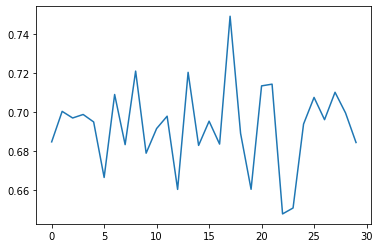

In [368]:
plt.plot(scores)

## Random Forest Classifier:
Random forests are essentially a collection of decision trees, where each tree is slightly different from the others.The idea of random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.
Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data. For this kind of data, linear models might be more appropriate.

### Not on the max features and N_ESTIMATORS
For n_estimators, larger is always better and for max features, take note of the following; Instead of looking for the best test for each node(like the single decision tree), in each node the algorithm randomly selects a subset of the features, and looks for the best possible test involving one of these features. Note that The amount of features that is selected is controlled by the max_features parameter

In [397]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=150, random_state=0)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(model1, df_train, label, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print(f" roc_auc: {round(mean(scores), 3)}, {round(std(scores), 3)}")


 roc_auc: 0.681, 0.021


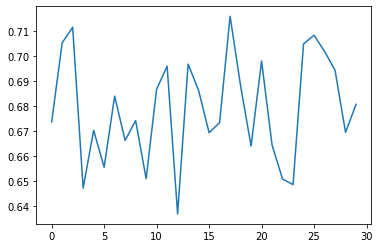

In [345]:
plt.plot(scores)

## Gradient Boosting Classifier
Note the following: By default, 100 trees of maximum depth three are used, with a learning rate of 0.1.
The main parameters of the gradient boosted tree models are the number of trees n_estimators, and the learning_rate, which controls how much each tree is allowed to correct the mistakes of the previous trees. Another important parameter is max_depth, which is usually very low for gradient boosted models, often not deeper than five splits.

### One special thing to note is that The boosting algorithms work just fine without tuning

In [399]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(n_estimators = 30, max_depth = 5, random_state=0)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(model2, df_train, label, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print(f" roc_auc: {round(mean(scores), 5)}, {round(std(scores), 5)}")

 roc_auc: 0.71496, 0.01834


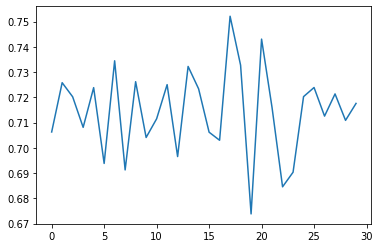

In [372]:
plt.plot(scores)

## LGBM Classifier

In [420]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
model3 = LGBMClassifier(n_estimators=30, silent=False, random_state =0, max_depth=5)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(model3, df_train, label, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print(f" roc_auc: {round(mean(scores), 10)}, {round(std(scores), 10)}")

 roc_auc: 0.7178959774, 0.0173728101


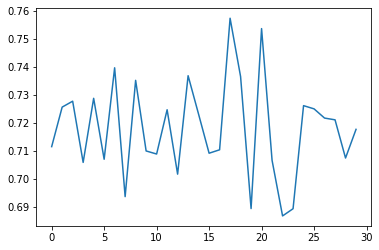

In [378]:
plt.plot(scores)

## XGBOOST CLASSIFIER:

In [452]:
from xgboost import XGBClassifier
model4 = XGBClassifier(n_estimators = 50, random_state = 0)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(model4, df_train, label, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print(f" roc_auc: {round(mean(scores), 10)}, {round(std(scores), 10)}")

 roc_auc: 0.7182567839, 0.0163727134


In [454]:
model4.fit(df_train, label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [458]:
y_pred = model4.predict(df_test)

In [487]:
f = pd.Series(test_id, name = 'Customer Id')
g = pd.Series(y_pred, name = 'Claim')
submit1 = pd.concat([f, g],axis = 1)

In [490]:
submit1.head()

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0


In [489]:
submit1.to_csv('submission.csv', index = False)

In [491]:
pwd

'C:\\Users\\acer'

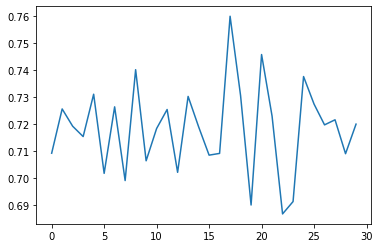

In [388]:
plt.plot(scores)

## ADABOOST CLASSIFIER

In [401]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier(n_estimators=25, random_state=0)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(model5, df_train, label, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print(f" roc_auc: {round(mean(scores), 5)}, {round(std(scores), 5)}")

 roc_auc: 0.71462, 0.01649


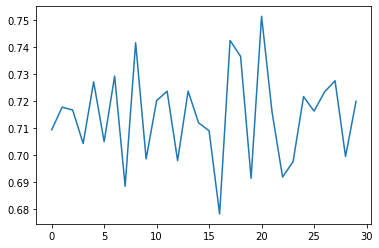

In [395]:
plt.plot(scores)

## Note: When trying to use train_test_split and Stacking of the classifiers, the model was performing very poorly. We have decided to use XGBOOST, IF OUR SCORE REMAINS POOR ON THE LEARDER BOARD, THEN WE WILL TRY TO USE SMOTE TO BALANCE THE DATASET.

In [ ]:
#from sklearn.ensemble import StackingClassifier
#estimators = [('lgb', model3)]
#final = model4
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_auc_score
#X_train, X_test, y_train, y_test = train_test_split(df_train, label, stratify = label, random_state = 0)
#clf = StackingClassifier(estimators = estimators, final_estimator = final)
#cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
#scores = cross_val_score(clf, df_train, label, scoring = 'roc_auc', cv = cv, n_jobs = -1)
#print(f" roc_auc: {round(mean(scores), 5)}, {round(std(scores), 5)}")
#clf.fit(X_train, y_train)